# Flyber - Midterm - Data Exploration

In [1]:
import sys
print(sys.version)

#array and vector processing 
import numpy as np
print(f'Numpy version:', np.__version__)

import pandas as pd
print(f'Pandas version:', pd.__version__)

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
print(f'Matplotlib version:', mpl.__version__)
%matplotlib inline

import seaborn as sns
print(f'Seaborn version:', sns.__version__)

#using the datetime object properties in pandas
import datetime as dt
from datetime import timedelta

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version: 1.19.2
Pandas version: 1.2.4
Matplotlib version: 3.3.4
Seaborn version: 0.11.1


# Data Preprocessing
### Reading the data

In [2]:
# Loading the taxi_rides data into the pandas Dataframe
df = pd.read_csv('../taxi-rides.csv')

In [3]:
#listing the columns pertaining to the rides table:
for col in sorted(df.columns):
    print(col)

Unnamed: 12
Unnamed: 13
Unnamed: 14
distance
dropoff_datetime
dropoff_latitude
dropoff_longitude
duration
id
passenger_count
pickup_datetime
pickup_latitude
pickup_longitude
store_and_fwd_flag
vendor_id


### Removing the empty columns

In [4]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [5]:
df.info() # 1.05 Million observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048468 non-null  object 
 1   vendor_id           1048468 non-null  int64  
 2   pickup_datetime     1048468 non-null  object 
 3   dropoff_datetime    1048468 non-null  object 
 4   passenger_count     1048468 non-null  int64  
 5   pickup_longitude    1048468 non-null  float64
 6   pickup_latitude     1048468 non-null  float64
 7   dropoff_longitude   1048468 non-null  float64
 8   dropoff_latitude    1048468 non-null  float64
 9   store_and_fwd_flag  1048468 non-null  object 
 10  duration            1048468 non-null  int64  
 11  distance            1048468 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 96.0+ MB


### Converting columns to the right datatypes

In [6]:
# Converting the data type for `pickup and dropoff` columns to datetimeIndex

df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

#converting vendor_id to type category
df['vendor_id'] = df['vendor_id'].astype('category') 

#converting object to boolean for the 'store_and_fwd_flag'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': False, 'Y': True})

In [7]:
#verifying the datatimes for each of the columns
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag              bool
duration                       int64
distance                     float64
dtype: object

### Checking for missing values

In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
duration              0
distance              0
dtype: int64

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,False,227,0.0
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,False,947,0.0
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,False,580,0.0
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,False,27,0.0
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,False,19,0.0


### Saving the dataset

In [10]:
### Saving the dataframe 

df.to_csv('./data/1_preprocessed_set.csv')

# Exploring the Data 

##  High-level understanding of the granularity and scope of the dataset.

### Q1. How many records are in the dataset?


In [11]:
df.shape

(1048468, 12)

### Q2. What does each record represent?

1. `id` = Trip ID allocated to each complete taxi ride
    
2. `vendor_id` = This field corresponds to two categories of taxi services in NYC. Yello taxi and Private taxi.
    
3. `pickup_datetime` = This is the timestamp of the pickup time for the associated trip id.
    
4. `dropoff_datetime` = This is the timestamp of the dropoff time for the associated trip id.

5. `passenger_count` = This corresponds to the number of passengers taking the taxiride for correponding trip id.

6. `pickup_latitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the pickup_latitude.

7. `pickup_longitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the pickup_longitude.

8. `dropoff_latitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the dropoff_latitude.

9. `dropoff_longitude` = This is the GPS coordinates in DMS(Degrees, Minutes and Seconds unit system) corresponding to the dropoff_longitude.

10. `store_and_fwd_flag` = 

11. `duration` = This column presents the duration of each trip in seconds.

12. `distance` = This column presents the distance in km travelled on each of the trips. The unit of this dimension is confirmed by verifying with computed 'great circle' and manhattan distance' to confirm the units of measure.


### 3. What is the primary key?

The `id` column is the primary key for this dataframe. Let's verify

In [12]:
df.info() # the count of observations correspond to 1048468.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  category      
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  bool          
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
dtypes: bool(1), category(1), datetime64[ns](2), float64(5), int64(2), obje

In [13]:
df.nunique() # the unique count of id's is 1048468 and is the primary key for our dataset

id                    1048468
vendor_id                   2
pickup_datetime        237124
dropoff_datetime       237437
passenger_count            10
pickup_longitude        21368
pickup_latitude         42575
dropoff_longitude       30913
dropoff_latitude        58283
store_and_fwd_flag          2
duration                 6883
distance              1042359
dtype: int64

### 4. What date range is your dataset bound to?

In [14]:
start = df.pickup_datetime.min()
end = df.dropoff_datetime.max()
print(start,",", end,",", end-start)

2016-01-01 00:00:00 , 2016-07-01 23:02:00 , 182 days 23:02:00


The range of observations start at 1st January 2016 to midnight of 1st July 2016
The total time window constitutes 182 days and 23 hours and 2 minutes.

### 5. What are the geographical bounds of this dataset? Is it limited to Manhattan, or is Brooklyn, Queens, Staten Island, the Bronx, and New Jersey included? Where are most of the data points centralized at? Are there outliers?

This details of this question are in the Map Analysis notebook.

--------------------

# Data Analysis & Data Visualisation


For getting hang of the data distributions - let's first create additional datafields. 

Additonal columns we need to create are `price` `distance` `manhattan_dist` `dur_to_dist` `dur_to_dist_m` `dist_to_dur` and for further analysis down the road we require parsing of `datetimeIndex`.
    

## Deriving Additional columns - `Distance`

### Computing Manhattan distance. 

After much research and even working on computing distance from the geodesic-circle functions available on geopandas library. I figured to make use of the Manhattan distance to perform the computation. I used this open-source-code available at this location to compute the 'manhattan' distance as the computation procedure aptly applies to manhattan location area owing to the perpendicular street ways. 

Ref: https://medium.com/@simplyjk/why-manhattan-distance-formula-doesnt-apply-to-manhattan-7db0ebb1c5f6

In [15]:
def haversine(lat1, lon1, lat2, lon2):     
    # R = 3958.76 # Earth radius in miles    
    R = 6371 # Earth radisu in KM
    dLat, dLon, lat1, lat2 = np.radians(lat2 - lat1), np.radians(lon2 - lon1), np.radians(lat1), np.radians(lat2)     
    
    a =  np.sin(dLat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon/2) ** 2     

    c = 2 * np.arcsin(np.sqrt(a))          
    
    return R * c
  
def manhattan_dist(lat1, lon1, lat2, lon2):
    
    # Pickup coordinates
    p = np.stack([lat1, lon1], axis = 1)
    
    # Dropoff coordinates
    d = np.stack([lat2, lon2], axis = 1)
    
    theta1 = np.radians(-28.904)
    theta2 = np.radians(28.904)
    
    ## Rotation matrix
    R1 = np.array([[np.cos(theta1), np.sin(theta1)], 
                   [-np.sin(theta1), np.cos(theta1)]]
                 )
    R2 = np.array([[np.cos(theta2), np.sin(theta2)], 
                   [-np.sin(theta2), np.cos(theta2)]]
                 )
    
    # Rotate Pickup and Dropoff coordinates by -29 degress in World2
    pT = R1 @ p.T  
    dT = R1 @ d.T  
    
    # Coordinates of Hinge point in the rotated world 
    vT = np.stack((pT[0,:], dT[1,:]))
    # Coordinates of Hinge point in the real world 
    v = R2 @ vT

    
    return (haversine(p.T[0], p.T[1], v[0], v[1]) + 
            haversine(v[0], v[1], d.T[0], d.T[1])
           )
  

In [16]:
#passing the parameters to the manhattan_dist function defined in the above cell

df["manhattan_dist"] = manhattan_dist(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"] )



### Replacing 'zero' `distance` values with mean distance

In [17]:
## calculating number of observations where distance = 0

(df[df.distance== 0][['id','distance','duration','manhattan_dist']]).shape



(3573, 4)

In [18]:
# calculating number of observations where manhattan_dist = 0
#subset view

print(df.head(5))

(df[df.manhattan_dist == 0][['id','distance','duration','manhattan_dist']]).shape



          id vendor_id     pickup_datetime    dropoff_datetime  \
0  id3487442         2 2016-02-29 18:39:00 2016-02-29 18:42:00   
1  id1145809         2 2016-05-16 23:15:00 2016-05-16 23:31:00   
2  id3499387         1 2016-01-25 19:45:00 2016-01-25 19:54:00   
3  id0753277         1 2016-01-27 22:29:00 2016-01-27 22:29:00   
4  id2134482         1 2016-01-22 16:13:00 2016-01-22 16:13:00   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.981819        40.768963         -73.981819   
1                6        -73.808487        40.687336         -73.808487   
2                1        -73.786720        40.647041         -73.786720   
3                1        -74.209854        40.816853         -74.209854   
4                1        -73.776314        40.645454         -73.776314   

   dropoff_latitude  store_and_fwd_flag  duration  distance  manhattan_dist  
0         40.768963               False       227       0.0    0.000

(862, 4)

**Note:**

The computed distance based on all reasoning above, has been able to reduce the 'errors' in analysis and reporting and a **75% reduction** in zeros is great for imputing for zero's occurring in the `manhattan_distance` column alone

Moving the computation of all additional columns to after adding a random number from 0.1KM to 0.322 KM for 862 observations of where manhattan_dist values are '0'.

In [19]:
#calculating the mean and assigning that value for the 0.0 value cells in `manhattan_dist`

range = np.random.uniform(0.1, 0.3, 862)
range.mean() # 0.201529.
# the mean keeps varying for now however - I am sticking with the above computation.

0.20047220967417825

In [20]:
# adding the corrected dataset for each of the 862 observations.
# reference https://stackoverflow.com/questions/37506488/python-pandas-dataframe-replace-0-with-median-value
df = df.replace({'manhattan_dist': {0: 0.201529}})


In [21]:
#verifying if all zero cells are imputed with the mean calculated above.
print(df['manhattan_dist'].sample(3))
(df[df.manhattan_dist == 0][['id','distance','duration','manhattan_dist']]).shape

667703      4.563451
1021523    26.928862
42036       0.653940
Name: manhattan_dist, dtype: float64


(0, 4)

### Creating additional analytic columns

In [22]:
#converting duration to hours 

df['duration_hours'] = df["duration"]/3600
df['duration_min'] = df["duration"]/60

# computing additional duration to distance column 

df['dur_to_dist'] = df['duration_hours']/df['distance']
df['dur_to_dist_m'] = df['duration_hours']/df['manhattan_dist']

# computing additional distance to duration column 
df['speed_kmph'] = df['distance'] /df['duration_hours']
df['speed_kmph_m'] = df['manhattan_dist'] /df['duration_hours']

## Deriving Additional columns - `Price`

As the taxt ride price is a 'derived column' I am using the inputs available on the NYC webpage to arrive at the price for each of the 1m+ rides present in the dataset. Firstly, planning out the conditional criterion that help derive the price function are presented and grouped below.


### Fare calculation formula is derived from here: ( https://www.estimate.taxi/rates/united-states/new-york)

`Price` is computed as below:

C1. Base price is **$2.50** for first **0.322km**

     Additional price for every **0.322km** is **$0.50**


C2. Waiting time is **$30.00/hour**


C3. Additional Peak rate for (**16:00 - 19:59** on Monday, Tuesday, Wednesday, Thursday, Friday only) of **$1.00**


       Additional night fee of **$0.50**


C4. Including another criterion to passenger count. If passenger count is > 2, price billed is 1.2 times the price computed based on all criterion put together


C5. Further, taxi rates go the highest peak To/From JFK and any location in Manhattan. **$52.00** plus tolls + many surcharges...



###  Defining the `price` function per above criterion

In [23]:
# writing a function dependent on the distance variable - based on C1 condition.

def criterion_1(row):
    if row['distance'] < 0.322:
        return 2.5
    else:
        return 0.5 * (row['distance']-0.322)/0.322
    
df['criterion_1'] = df.apply(criterion_1, axis=1)   
    
# writing a function dependent on the duration variable - based on C2 condition.

def criterion_2(row):
    if row['duration'] > 3600 and row ['duration'] < 7200:
        return 30
    else:
        return 30 * (row['duration']/3600)
    
df['criterion_2'] = df.apply(criterion_2, axis=1)  

# Before applying the C3 bove to the dataframe - we require the columns of hour and day_name for deriving the 
#price based of C3.

# obtaining columns of hour and day_name utilizing the datetime pandas indexing

df["day_name"] = df['pickup_datetime'].dt.day_name()
df["hour"] = df['pickup_datetime'].dt.hour

def criterion_3(row):
    if row['hour'] > 16 and row ['hour'] < 20 and row['day_name'] == ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 1
    elif row['hour'] > 20 and row['hour'] < 6: 
        return 0.5
    else: 
        return 0
    
df['criterion_3'] = df.apply(criterion_3, axis=1) 

In [24]:
# deriving the price as a sum of the 3 conditional functions

df['price']= df['criterion_1']+df['criterion_2']+df['criterion_3']

In [25]:
# writing a function for the duration based conditional based on C4 above.

def criterion_4(row):
    if row['passenger_count'] <= 2 :
        return (row['price'] * 1)
    else:
        return (row['price'] * 1.2 )
    
df['criterion_4'] = df.apply(criterion_4, axis=1)  


In [26]:
# deriving the price as a sum of all **4 conditional functions**

df['price']= df['criterion_1']+df['criterion_2']+df['criterion_3']+df['criterion_4']

In [27]:
df['price'].describe().T #Mean price $ 26.14 and Standard Deviation $ 100.33. 


count    1.048468e+06
mean     2.613925e+01
std      1.003303e+02
min      9.031562e-02
25%      1.013871e+01
50%      1.725429e+01
75%      2.961762e+01
max      5.883217e+04
Name: price, dtype: float64

The Dataset above has all of the outliers included, which are falling outside of the bounds of NYC. A better estimate would be to exclude outliers and then computing the descriptive stats of `price` variable.

## Datetime column parsing 

In [28]:
# categories as default are unordered, setting the order of category for month and day names
from pandas.api.types import CategoricalDtype

month_cat = CategoricalDtype(categories=["January", "February","March","April","May","June"], ordered = True)
day_cat = CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], ordered = True)


In [29]:
# additional columns being parsed.
df["day_name"] = df['pickup_datetime'].dt.day_name().astype(day_cat)
df["month_name"] = df['pickup_datetime'].dt.month_name().astype(month_cat)
df["day"] = df['pickup_datetime'].dt.day

In [30]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [31]:
df.info() # 1.05 Million observations 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  category      
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  bool          
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
 12  manhattan_dist      1048468 non-null  float64       
 13  duration_hou

### Saving the dataset with additional columns and date time features

In [32]:
df = df.drop(columns=[col for col in df.columns if 'criterion' in col])
print(df.shape)
print(df.info())

(1048468, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  category      
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  bool          
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
 12  manhattan_dist      1048468 non-null  float64       
 13

In [33]:
### Saving the dataframe 

df.to_csv('./data/2_additional_col_set.csv')

--------------------

# Descriptive Statistics


### Exploring `passenger_count` `distance`  and `duration` columns

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

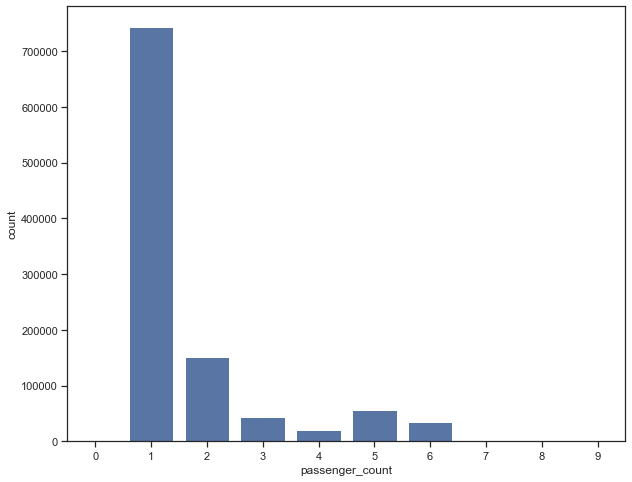

In [56]:
fig,ax = plt.subplots(1,figsize =(10,8))

sns.countplot(ax=ax, data=df, x ='passenger_count', color='C0' )


Low Volume picks ups that constitute **(1-2 passengers) comprise 85%** of the entire dataset ~ 895K riders.


In [35]:
print(df.shape)
df.head()

(1048468, 24)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,duration_min,dur_to_dist,dur_to_dist_m,speed_kmph,speed_kmph_m,day_name,hour,price,month_name,day
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,False,...,3.783333,inf,3.128858e-01,0.0,3.196055e+00,Monday,18,8.783333,February,29
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,False,...,15.783333,inf,1.305299e+00,0.0,7.661081e-01,Monday,23,22.861667,May,16
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,False,...,9.666667,inf,7.994438e-01,0.0,1.250870e+00,Monday,19,14.666667,January,25
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,False,...,0.450000,inf,2.616327e+09,0.0,3.822152e-10,Wednesday,22,5.450000,January,27
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,False,...,0.316667,inf,2.200972e+09,0.0,4.543447e-10,Friday,16,5.316667,January,22


##  Let’s understand the scope and distribution various dimensions within the dataset. 

Calculate the average, median, and the first & second standard deviation of the mean for the following measures:
1. duration
2. distance 
3. passenger counts 
4. duration-to-distance ratio 
5. price


In [36]:
df[["duration","duration_hours", "passenger_count",'price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,1048468.0,9.621956e+02,5.853297e+03,1.000000e+00,397.000000,662.000000,1075.000000,3.526282e+06
duration_hours,1048468.0,2.672766e-01,1.625916e+00,2.777778e-04,0.110278,0.183889,0.298611,9.795228e+02
passenger_count,1048468.0,1.664377e+00,1.314244e+00,0.000000e+00,1.000000,1.000000,2.000000,9.000000e+00
price,1048468.0,2.613925e+01,1.003303e+02,9.031562e-02,10.138709,17.254286,29.617619,5.883217e+04
dur_to_dist_m,1048468.0,2.094584e+08,1.756974e+10,1.220801e-04,0.044023,0.062167,0.087929,1.500062e+13
manhattan_dist,1048468.0,4.477429e+00,6.105148e+00,1.580175e-12,1.558435,2.626604,4.770337,1.485260e+03
speed_kmph_m,1048468.0,1.843069e+01,1.840331e+01,6.666389e-14,11.372850,16.085650,22.715425,8.191346e+03


In [57]:
df[["duration","duration_hours","passenger_count",'price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

#this correlation matrix shows a high +ve of price to duration

,duration,duration_hours,passenger_count,price,dur_to_dist_m,manhattan_dist,speed_kmph_m
duration,1.0,1.0,0.0072,0.99,0.019,0.084,-0.015
duration_hours,1.0,1.0,0.0072,0.99,0.019,0.084,-0.015
passenger_count,0.0072,0.0072,1.0,0.017,0.0025,0.01,-0.0012
price,0.99,0.99,0.017,1.0,0.019,0.22,0.068
dur_to_dist_m,0.019,0.019,0.0025,0.019,1.0,-0.0087,-0.012
manhattan_dist,0.084,0.084,0.01,0.22,-0.0087,1.0,0.59
speed_kmph_m,-0.015,-0.015,-0.0012,0.068,-0.012,0.59,1.0


***Note:**
    
    

### Distance and Duration viz - entire taxi dataset

/usr/local/anaconda3/envs/newenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/newenv/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/newenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/u

<AxesSubplot:title={'center':'Distribution of Trip `Duration`'}, xlabel='duration_hours', ylabel='Counts'>

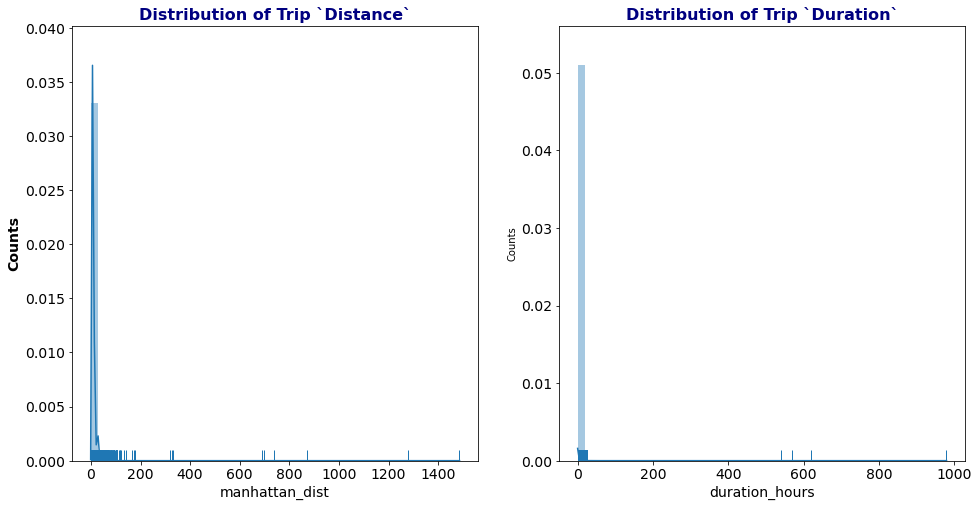

In [38]:
fig = plt.figure(figsize=(16,8))

# Plot 1
ax1 = plt.subplot(121)

plt.xlabel('Distance (KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Distance`', color='navy', fontsize=16,  weight='bold')

sns.distplot(df.manhattan_dist, ax=ax1, kde=True, rug=True, )

# Plot 2
ax2 = plt.subplot(122)

plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Counts')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Duration`', color='navy', fontsize=16,  weight='bold')

sns.distplot(df.duration_hours, kde=True, rug=True, ax=ax2)


### Trend line of taxi rides data 

<AxesSubplot:title={'center':'Trip Duration and Distance plot per pickup-dropoff pair'}, xlabel='manhattan_dist', ylabel='duration'>

<Figure size 432x288 with 0 Axes>

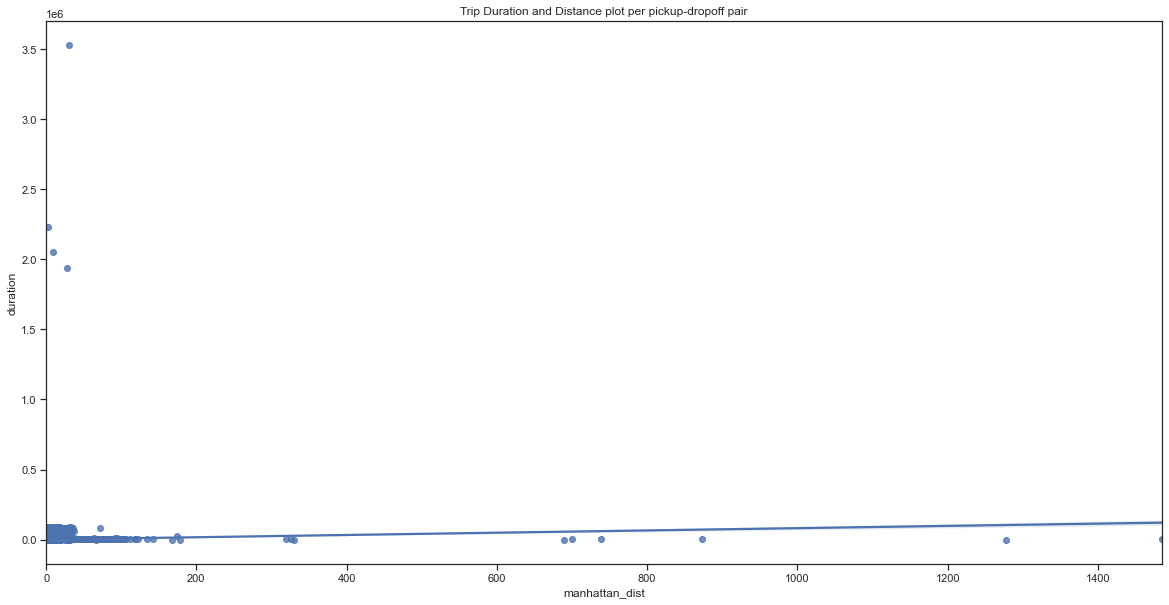

In [39]:
from matplotlib import style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
sns.despine()
sns.set_style("ticks")

fig,ax = plt.subplots(1, figsize=(20,10))

ax.set_xlabel('hour')
ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair')

sns.regplot(x="manhattan_dist", y="duration", data=df, ax=ax)

### Distance and Duration viz - inliers 
Output loaded from the geographical analysis of pickup points - book 2

In [40]:
inp_df = pd.read_csv('./data/joined_inliers_p.csv')

In [41]:
print(inp_df.info())
inp_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032162 entries, 0 to 1032161
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1032162 non-null  int64  
 1   id                  1032162 non-null  object 
 2   vendor_id           1032162 non-null  int64  
 3   pickup_datetime     1032162 non-null  object 
 4   dropoff_datetime    1032162 non-null  object 
 5   passenger_count     1032162 non-null  int64  
 6   pickup_longitude    1032162 non-null  float64
 7   pickup_latitude     1032162 non-null  float64
 8   dropoff_longitude   1032162 non-null  float64
 9   dropoff_latitude    1032162 non-null  float64
 10  store_and_fwd_flag  1032162 non-null  bool   
 11  duration            1032162 non-null  int64  
 12  distance            1032162 non-null  float64
 13  manhattan_dist      1032162 non-null  float64
 14  duration_hours      1032162 non-null  float64
 15  duration_min   

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,day_name,hour,price,month_name,day,geometry,index_right,zcta,bcode,note
0,0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,...,Monday,18,8.783333,February,29,POINT (-73.98181915000001 40.76896286),23.0,10023,36061,NaN
1,1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,...,Monday,23,22.861667,May,16,POINT (-73.80848693999999 40.68733597),191.0,11419,36081,NaN
2,2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,...,Monday,19,14.666667,January,25,POINT (-73.78672028 40.64704132),202.0,11430,36081,NaN
3,4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,...,Friday,16,5.316667,January,22,POINT (-73.77631378 40.64545441),202.0,11430,36081,NaN
4,5,id2892749,1,2016-01-18 15:24:00,2016-01-18 15:28:00,5,-73.954666,40.821003,-73.954666,40.821003,...,Monday,15,10.156667,January,18,POINT (-73.95466614 40.82100296),34.0,10031,36061,NaN


In [42]:
inp_df[['duration','duration_hours','passenger_count','price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,1032162.0,9.629402e+02,5.882816e+03,1.000000e+00,397.000000,663.000000,1076.000000,3.526282e+06
duration_hours,1032162.0,2.674834e-01,1.634115e+00,2.777778e-04,0.110278,0.184167,0.298889,9.795228e+02
passenger_count,1032162.0,1.663335e+00,1.313487e+00,0.000000e+00,1.000000,1.000000,2.000000,8.000000e+00
price,1032162.0,2.617917e+01,1.007014e+02,9.031562e-02,10.144042,17.280639,29.685079,5.883217e+04
dur_to_dist_m,1032162.0,2.027398e+08,1.767424e+10,1.220801e-04,0.043927,0.062063,0.087774,1.500062e+13
manhattan_dist,1032162.0,4.491806e+00,5.808737e+00,1.580175e-12,1.558941,2.632175,4.792590,8.728870e+02
speed_kmph_m,1032162.0,1.844746e+01,1.532728e+01,6.666389e-14,11.392930,16.112725,22.765014,8.191346e+03


In [58]:
inp_df[['duration','duration_hours','passenger_count','price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

,duration,duration_hours,passenger_count,price,dur_to_dist_m,manhattan_dist,speed_kmph_m
duration,1.0,1.0,0.0072,0.99,0.019,0.089,-0.018
duration_hours,1.0,1.0,0.0072,0.99,0.019,0.089,-0.018
passenger_count,0.0072,0.0072,1.0,0.017,0.0026,0.01,-0.0026
price,0.99,0.99,0.017,1.0,0.019,0.21,0.051
dur_to_dist_m,0.019,0.019,0.0026,0.019,1.0,-0.0089,-0.014
manhattan_dist,0.089,0.089,0.01,0.21,-0.0089,1.0,0.53
speed_kmph_m,-0.018,-0.018,-0.0026,0.051,-0.014,0.53,1.0


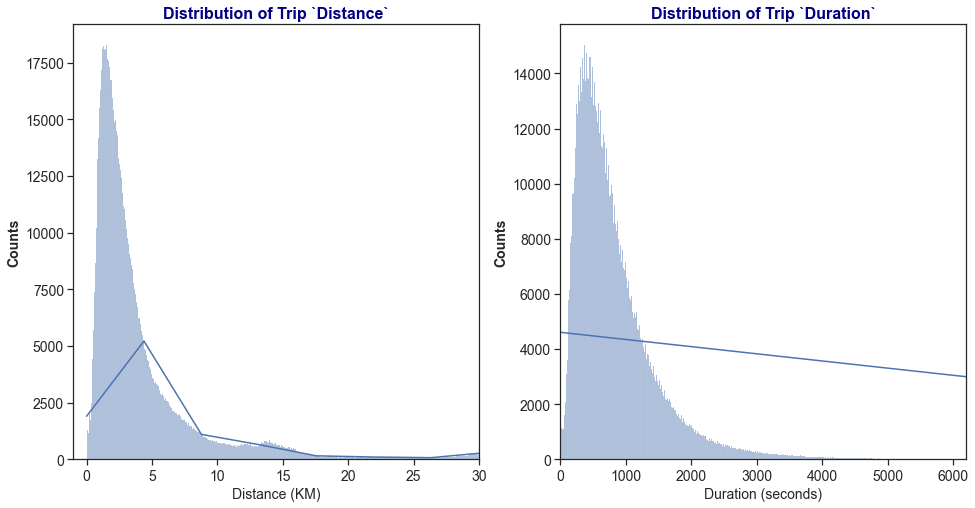

In [44]:
fig = plt.figure(figsize=(16,8))

# Plot 1
ax1 = plt.subplot(121)

plt.xlabel('Distance (KM)', fontsize=14)
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Distance`', color='navy', fontsize=16,  weight='bold')

plt.xlim([-1,30])
ax1= sns.histplot(data= inp_df, x='manhattan_dist', kde=True)

# ax1.set_xticks(range(-1,30))

# Plot 2
ax2 = plt.subplot(122)

plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Counts',fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Trip `Duration`', color='navy', fontsize=16,  weight='bold')

plt.xlim([0,6200])
ax2= sns.histplot(data=inp_df, x='duration', kde=True)

<AxesSubplot:title={'center':'Trip Duration and Distance plot per pickup-dropoff pair'}, xlabel='manhattan_dist', ylabel='duration'>

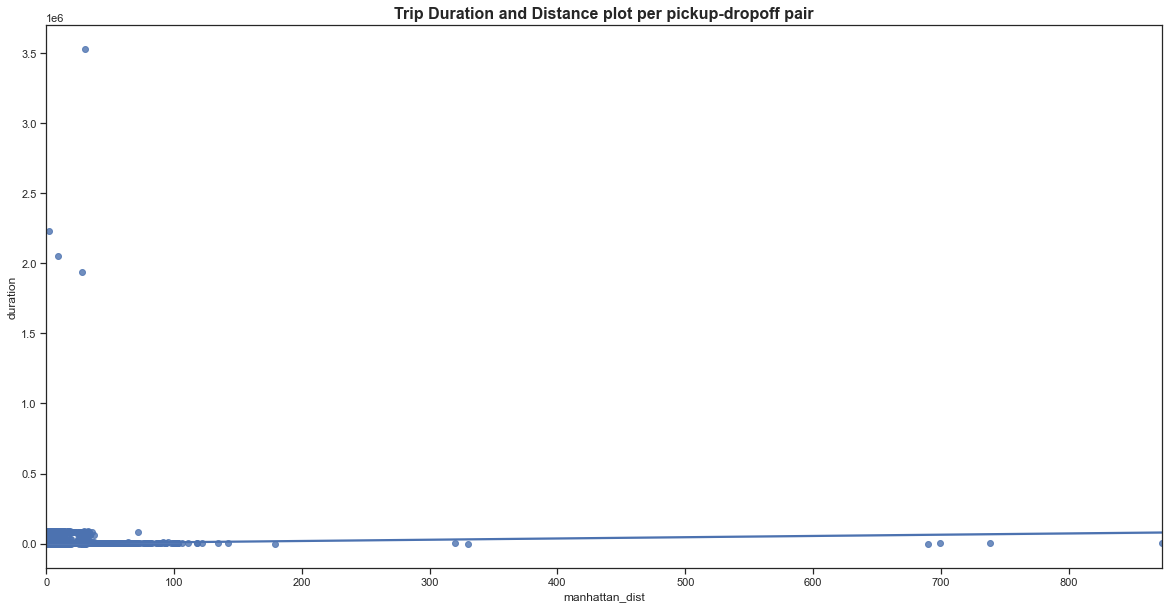

In [60]:
fig,ax = plt.subplots(1, figsize=(20,10))

ax.set_xlabel('hour')
ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair',fontsize=16,  weight='bold' )

sns.regplot(x="manhattan_dist", y="duration", data=inp_df, ax=ax)

### Distance and Duration viz - outliers
Output loaded from the geographical analysis of pickup points - book 2

In [46]:
outp_df = pd.read_csv('./data/joined_outliers_p.csv')

In [47]:
print(outp_df.info())
outp_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16306 non-null  int64  
 1   id                  16306 non-null  object 
 2   vendor_id           16306 non-null  int64  
 3   pickup_datetime     16306 non-null  object 
 4   dropoff_datetime    16306 non-null  object 
 5   passenger_count     16306 non-null  int64  
 6   pickup_longitude    16306 non-null  float64
 7   pickup_latitude     16306 non-null  float64
 8   dropoff_longitude   16306 non-null  float64
 9   dropoff_latitude    16306 non-null  float64
 10  store_and_fwd_flag  16306 non-null  bool   
 11  duration            16306 non-null  int64  
 12  distance            16306 non-null  float64
 13  manhattan_dist      16306 non-null  float64
 14  duration_hours      16306 non-null  float64
 15  duration_min        16306 non-null  float64
 16  dur_

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,day_name,hour,price,month_name,day,geometry,index_right,zcta,bcode,note
0,3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,...,Wednesday,22,5.450000,January,27,POINT (-74.20985413 40.81685257),NaN,NaN,NaN,NaN
1,12,id1606138,2,2016-04-27 15:14:00,2016-04-27 15:15:00,2,-74.177780,40.690281,-74.177780,40.690281,...,Wednesday,15,5.116667,April,27,POINT (-74.17778015 40.69028091),NaN,NaN,NaN,NaN
2,21,id0688948,1,2016-04-14 20:13:00,2016-04-14 20:13:00,1,-74.161804,40.836494,-74.161804,40.836494,...,Thursday,20,5.250000,April,14,POINT (-74.16180420000001 40.83649445),NaN,NaN,NaN,NaN
3,36,id3535158,1,2016-02-11 18:57:00,2016-02-11 19:14:00,1,-73.735237,40.822712,-73.735237,40.822712,...,Thursday,18,21.666667,February,11,POINT (-73.73523711999999 40.82271194),NaN,NaN,NaN,NaN
4,50,id1436954,2,2016-04-25 13:18:00,2016-04-25 13:26:00,1,-73.966537,40.784092,-73.966537,40.784092,...,Monday,13,12.266667,April,25,POINT (-73.96653748 40.78409195),NaN,NaN,NaN,NaN


In [48]:
outp_df[['duration','duration_hours','passenger_count','price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,16306.0,9.150622e+02,3.511458e+03,2.000000e+00,385.000000,624.000000,1009.000000,8.635100e+04
duration_hours,16306.0,2.541839e-01,9.754050e-01,5.555556e-04,0.106944,0.173333,0.280278,2.398639e+01
passenger_count,16306.0,1.730345e+00,1.359720e+00,0.000000e+00,1.000000,1.000000,2.000000,9.000000e+00
price,16306.0,2.361241e+01,7.305641e+01,3.702968e-01,9.826370,15.877707,25.563250,3.865954e+03
dur_to_dist_m,16306.0,6.347448e+08,8.682221e+09,1.329079e-04,0.050426,0.068751,0.097414,3.879669e+11
manhattan_dist,16306.0,3.567351e+00,1.612400e+01,1.580175e-12,1.527531,2.371396,3.671694,1.485260e+03
speed_kmph_m,16306.0,1.736888e+01,8.310048e+01,2.577540e-12,10.265503,14.545346,19.830915,7.524009e+03


In [59]:
outp_df[['duration','duration_hours','passenger_count','price','dur_to_dist_m','manhattan_dist','speed_kmph_m']].corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('YlGnBu'),axis=1)

,duration,duration_hours,passenger_count,price,dur_to_dist_m,manhattan_dist,speed_kmph_m
duration,1.0,1.0,0.0066,0.83,5.2e-05,0.033,-0.01
duration_hours,1.0,1.0,0.0066,0.83,5.2e-05,0.033,-0.01
passenger_count,0.0066,0.0066,1.0,0.024,-0.0036,0.015,0.013
price,0.83,0.83,0.024,1.0,-0.0032,0.58,0.51
dur_to_dist_m,5.2e-05,5.2e-05,-0.0036,-0.0032,1.0,-0.016,-0.015
manhattan_dist,0.033,0.033,0.015,0.58,-0.016,1.0,0.94
speed_kmph_m,-0.01,-0.01,0.013,0.51,-0.015,0.94,1.0


<AxesSubplot:title={'center':'Trip Duration and Distance plot per pickup-dropoff pair'}, xlabel='manhattan_dist', ylabel='duration'>

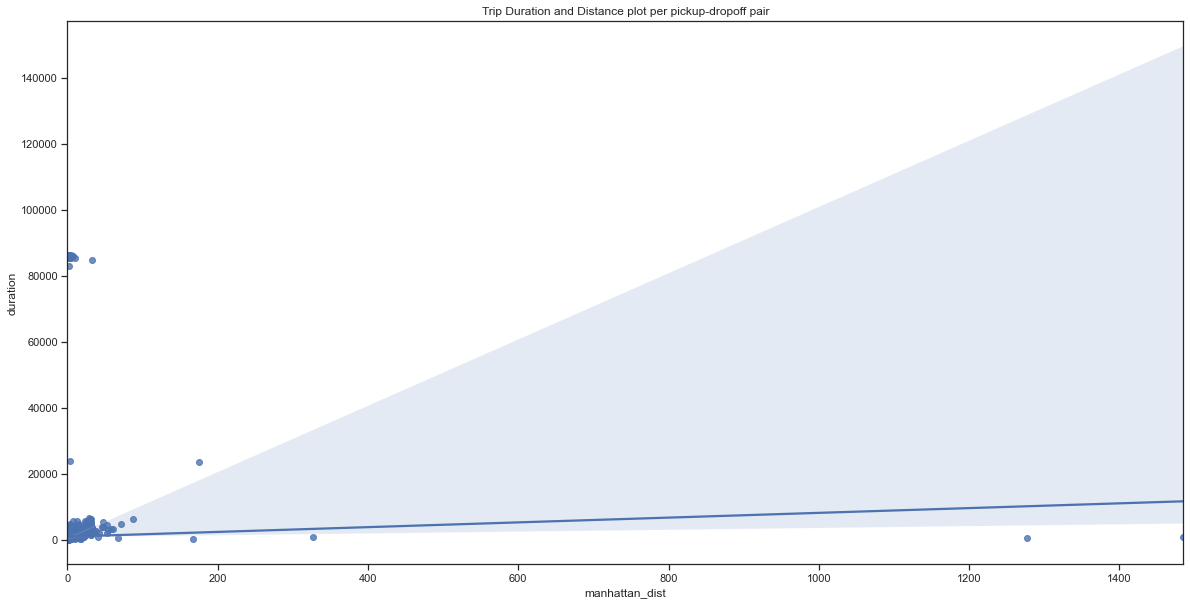

In [50]:
fig,ax = plt.subplots(1, figsize=(20,10))

ax.set_xlabel('hour')
ax.set_title('Trip Duration and Distance plot per pickup-dropoff pair')

sns.regplot(x="manhattan_dist", y="duration", data=outp_df, ax=ax)

In [51]:
inp_df_manhattan = inp_df.query('bcode == 36061')


In [52]:
inp_df_manhattan.groupby(['zcta'])['id'].count()

zcta
10001    52313
10002    19528
10003    54568
10004     5777
10005     4781
         ...  
10271       49
10278      239
10279      341
10280     5601
10282     4155
Name: id, Length: 69, dtype: int64

-------------------